In [3]:
import acquire
import prepare
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split

In [77]:
iris = acquire.get_iris_data()
iris.head()


this file exists, reading from csv


,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
species_id,,,,,,
1,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
1,3,4.7,3.2,1.3,0.2,setosa
1,4,4.6,3.1,1.5,0.2,setosa
1,5,5.0,3.6,1.4,0.2,setosa


In [78]:
iris = iris.drop('measurement_id',axis=1)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species_name
species_id,,,,,
1,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
1,4.7,3.2,1.3,0.2,setosa
1,4.6,3.1,1.5,0.2,setosa
1,5.0,3.6,1.4,0.2,setosa


In [79]:
iris.shape

(150, 5)

In [80]:
def prep_iris():
    iris = iris.reset_index(drop=True)
    iris = iris.drop(['measurement_id'], axis=1)
    iris = iris.rename(columns={'species_name':'species'})
    return iris

In [81]:
iris.shape

(150, 5)

In [82]:
print(iris.isnull().any().any())
print(iris.isnull().sum())

False
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species_name    0
dtype: int64


<Axes: xlabel='species_id'>

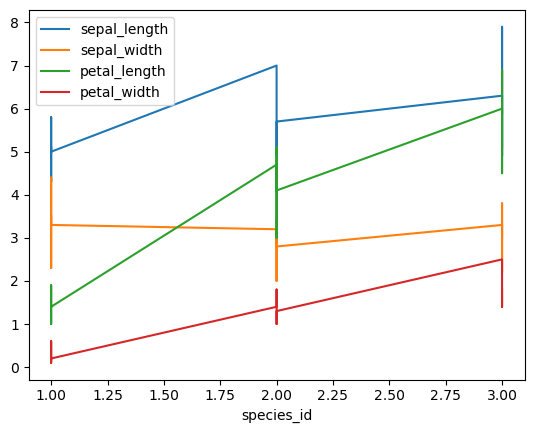

In [83]:
iris.plot()

<Axes: >

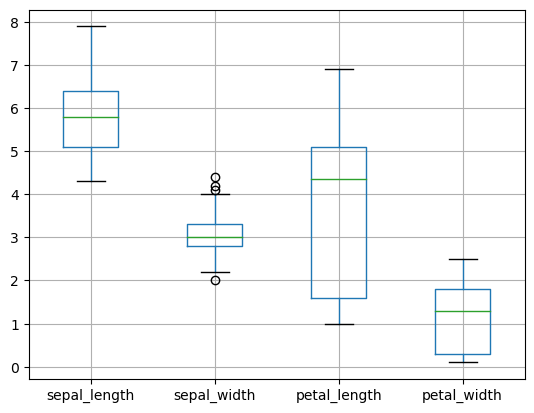

In [84]:
iris.boxplot()

In [85]:
print(iris.info())
print(iris.nunique())

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 1 to 3
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species_name  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB
None
sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species_name     3
dtype: int64


In [86]:
train, validate_test = train_test_split(iris, 
                 train_size=0.60, #size of the train df, and the test size will default to 1-train_size
                random_state=123, #set any number here for consistency
                 stratify=iris['species_name'] #need to stratify on target variable
                )
#second split
validate, test = train_test_split(validate_test, #this is the df that we are splitting now
                test_size=0.50, #set test or train size to 50%
                 random_state=123, #gotta send in a random seed
                stratify=validate_test['species_name']#still got to stratify
                )
       
   

In [87]:
print(train.shape)
print(validate.shape)
print(test.shape)

(90, 5)
(30, 5)
(30, 5)


In [88]:
print(train.head())
print(train.info())

            sepal_length  sepal_width  petal_length  petal_width species_name
species_id                                                                   
1                    4.8          3.4           1.9          0.2       setosa
3                    6.5          3.0           5.2          2.0    virginica
2                    5.6          3.0           4.1          1.3   versicolor
3                    6.3          2.7           4.9          1.8    virginica
1                    5.4          3.4           1.5          0.4       setosa
<class 'pandas.core.frame.DataFrame'>
Index: 90 entries, 1 to 3
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  90 non-null     float64
 1   sepal_width   90 non-null     float64
 2   petal_length  90 non-null     float64
 3   petal_width   90 non-null     float64
 4   species_name  90 non-null     object 
dtypes: float64(4), object(1)
memory usage: 4.2+ KB
None


# Univariate Stats 

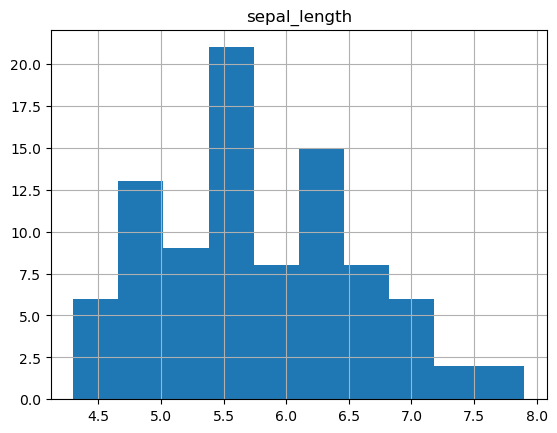

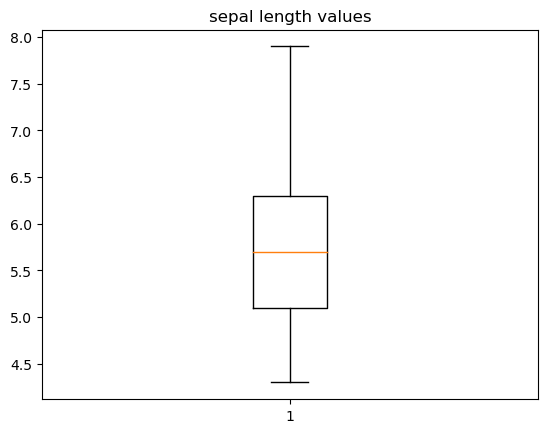

count    90.000000
mean      5.781111
std       0.792081
min       4.300000
25%       5.100000
50%       5.700000
75%       6.300000
max       7.900000
Name: sepal_length, dtype: float64

In [89]:
train.sepal_length.hist()
plt.title('sepal_length')
plt.show()

plt.boxplot(train['sepal_length'])
plt.title('sepal length values')
plt.show()

train.sepal_length.describe()

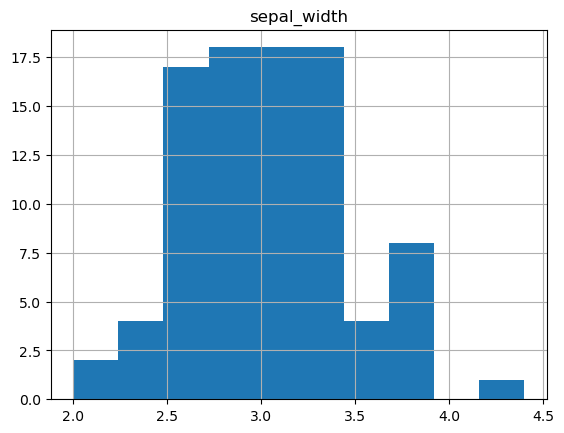

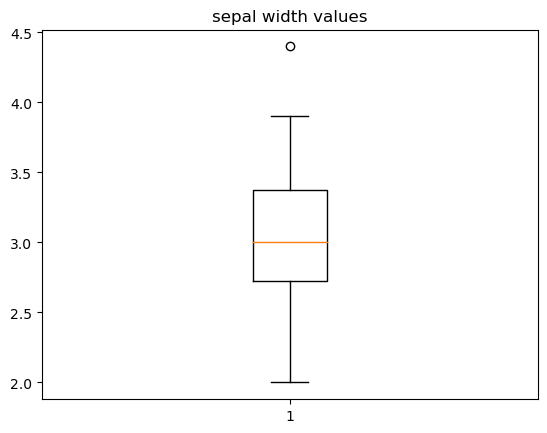

count    90.000000
mean      3.023333
std       0.434741
min       2.000000
25%       2.725000
50%       3.000000
75%       3.375000
max       4.400000
Name: sepal_width, dtype: float64


In [90]:
train.sepal_width.hist()
plt.title('sepal_width')
plt.show()

plt.boxplot(train['sepal_width'])
plt.title('sepal width values')
plt.show()

print(train.sepal_width.describe())

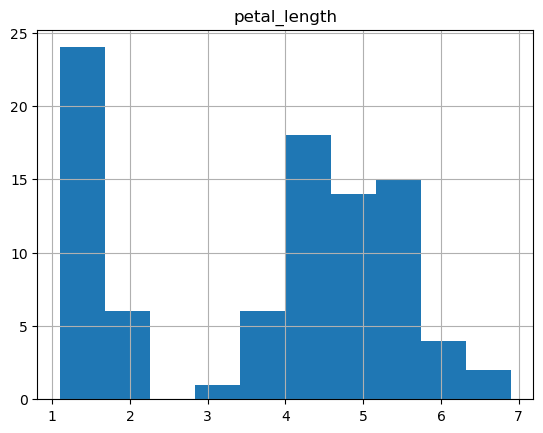

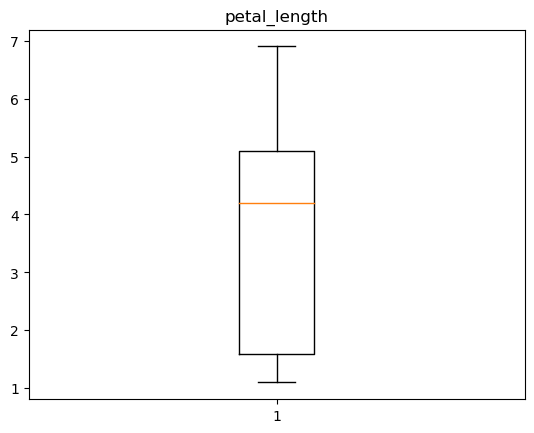

count    90.000000
mean      3.728889
std       1.710526
min       1.100000
25%       1.600000
50%       4.200000
75%       5.100000
max       6.900000
Name: petal_length, dtype: float64


In [91]:
train.petal_length.hist()
plt.title('petal_length')
plt.show()

plt.boxplot(train['petal_length'])
plt.title('petal_length')
plt.show()

print(train.petal_length.describe())

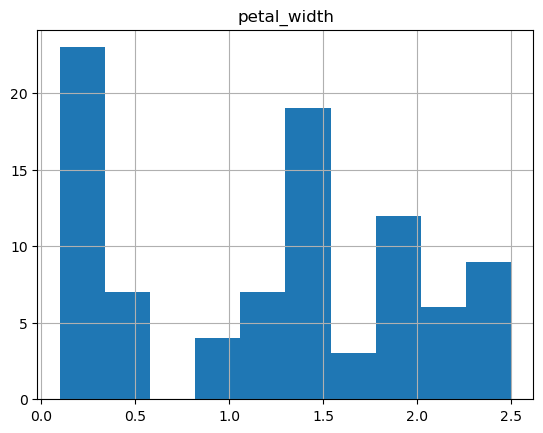

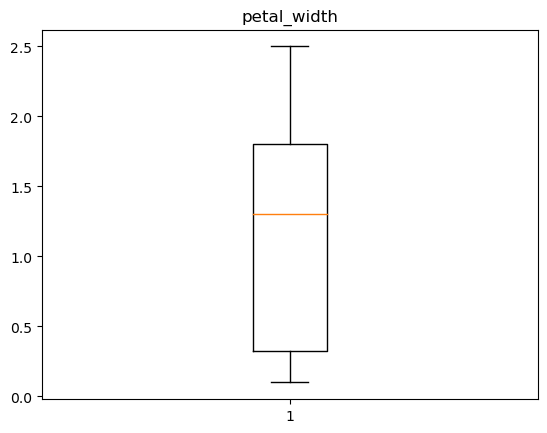

count    90.000000
mean      1.191111
std       0.757679
min       0.100000
25%       0.325000
50%       1.300000
75%       1.800000
max       2.500000
Name: petal_width, dtype: float64


In [92]:
train.petal_width.hist()
plt.title('petal_width')
plt.show()

plt.boxplot(train['petal_width'])
plt.title('petal_width')
plt.show()

print(train.petal_width.describe())

species_name
setosa        30
virginica     30
versicolor    30
Name: count, dtype: int64


<Axes: >

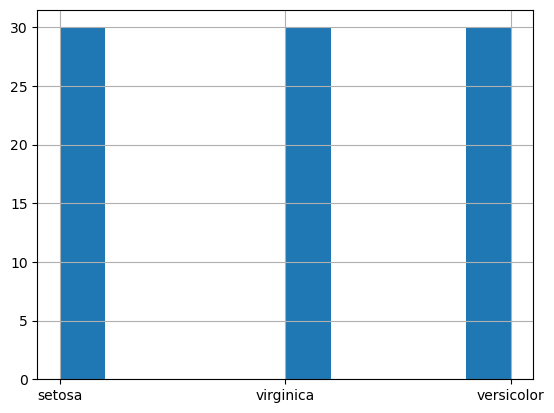

In [93]:
print(train['species_name'].value_counts())
train['species_name'].hist()

<Axes: >

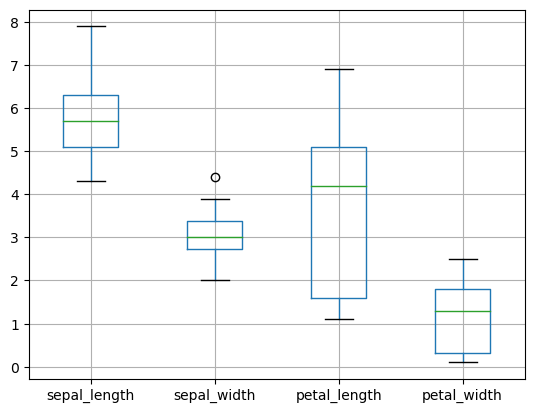

In [98]:
train.boxplot()

# Bivariate Stats

In [103]:
train

,sepal_length,sepal_width,petal_length,petal_width,species_name
species_id,,,,,
1,4.8,3.4,1.9,0.2,setosa
3,6.5,3.0,5.2,2.0,virginica
2,5.6,3.0,4.1,1.3,versicolor
3,6.3,2.7,4.9,1.8,virginica
1,5.4,3.4,1.5,0.4,setosa
...,...,...,...,...,...
2,6.9,3.1,4.9,1.5,versicolor
1,4.5,2.3,1.3,0.3,setosa
1,4.8,3.0,1.4,0.1,setosa


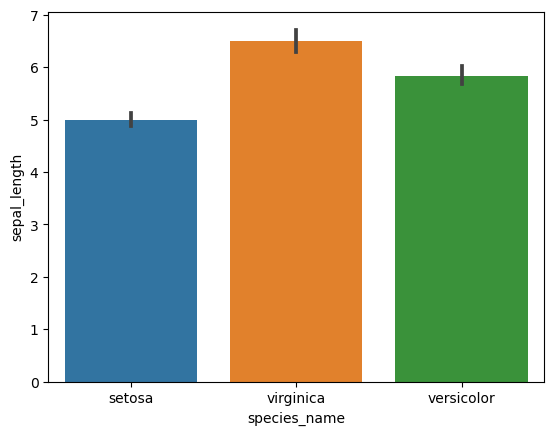

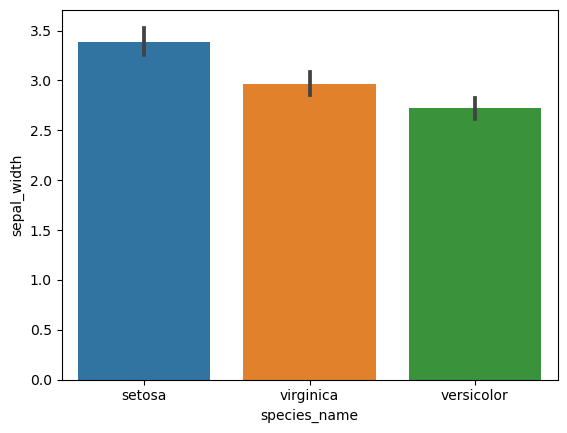

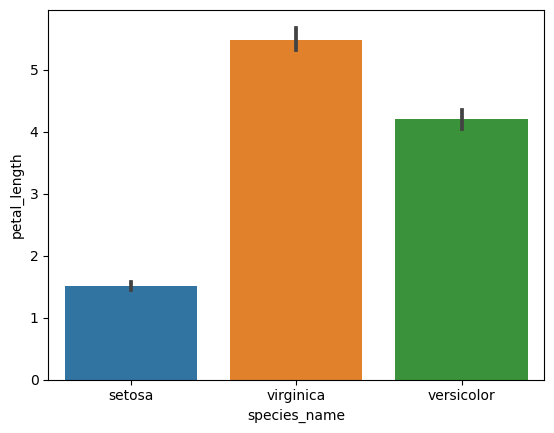

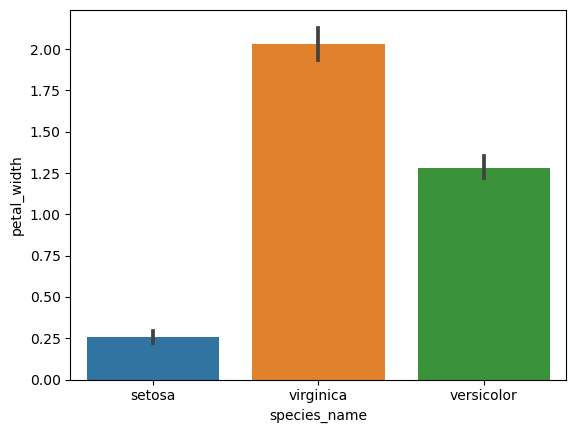

In [108]:
sns.barplot(data=train, x=train.species_name,y=train.sepal_length)
plt.show()

sns.barplot(data=train, x=train.species_name,y=train.sepal_width)
plt.show()

sns.barplot(data=train, x=train.species_name,y=train.petal_length)
plt.show()

sns.barplot(data=train, x=train.species_name,y=train.petal_width)
plt.show()

In [118]:
print(test[test.species_name=='setosa'].describe())

print(test[test.species_name=='virginica'].describe())

print(test[test.species_name=='versicolor'].describe())

       sepal_length  sepal_width  petal_length  petal_width
count     10.000000    10.000000     10.000000    10.000000
mean       4.980000     3.370000      1.380000     0.190000
std        0.361478     0.349762      0.168655     0.031623
min        4.400000     3.000000      1.000000     0.100000
25%        4.750000     3.125000      1.300000     0.200000
50%        4.950000     3.300000      1.400000     0.200000
75%        5.175000     3.475000      1.500000     0.200000
max        5.500000     4.200000      1.600000     0.200000
       sepal_length  sepal_width  petal_length  petal_width
count     10.000000    10.000000     10.000000    10.000000
mean       6.690000     2.910000      5.600000     2.020000
std        0.693542     0.307137      0.603692     0.261619
min        5.800000     2.200000      4.900000     1.500000
25%        6.175000     2.800000      5.100000     1.900000
50%        6.500000     3.000000      5.550000     2.000000
75%        7.250000     3.150000      6.

In [128]:
# 2 sample 2 tailed test fpr petal width
Ho = 'no difference in petal_width between virginica & versicolor'
Ha = 'there is a difference in petal_width between virginica & versicolor '
alpha = 0.05

In [123]:
virginica = test[test.species_name=='virginica'].petal_width
versicolor = test[test.species_name=='versicolor'].petal_width

In [126]:
s,p=stats.mannwhitneyu(virginica,versicolor)
s,p

(97.5, 0.0003419521826060256)

In [130]:
if p<alpha:
    print(f'reject:{Ho}')
else:
    print(f'{Ha}')

reject:no difference in petal_width between virginica & versicolor


In [131]:
# 2 sample 2 tailed test fpr petal length
Ho = 'no difference in petal_length between virginica & versicolor'
Ha = 'there is a difference in petal_length between virginica & versicolor '
alpha = 0.05

virginica = test[test.species_name=='virginica'].petal_length
versicolor = test[test.species_name=='versicolor'].petal_length

s,p=stats.mannwhitneyu(virginica,versicolor)
s,p


if p<alpha:
    print(f'reject:{Ho}')
else:
    print(f'{Ha}')

reject:no difference in petal_length between virginica & versicolor


In [134]:
## 2 sample 2 tailed test fpr sepal_length
Ho = 'no difference in sepal_length between virginica & versicolor'
Ha = 'there is a difference in sepal_length between virginica & versicolor '
alpha = 0.05

virginica = test[test.species_name=='virginica'].sepal_length
versicolor = test[test.species_name=='versicolor'].sepal_length

s,p=stats.mannwhitneyu(virginica,versicolor)
s,p


if p<alpha:
    print(f'reject:{Ho}')
else:
    print(f'fail to reject: {Ho}')

fail to reject: no difference in sepal_length between virginica & versicolor


In [135]:
## 2 sample 2 tailed test fpr sepal_width
Ho = 'no difference in sepal_width between virginica & versicolor'
Ha = 'there is a difference in sepal_width between virginica & versicolor '
alpha = 0.05

virginica = test[test.species_name=='virginica'].sepal_width
versicolor = test[test.species_name=='versicolor'].sepal_width

s,p=stats.mannwhitneyu(virginica,versicolor)
s,p


if p<alpha:
    print(f'reject:{Ho}')
else:
    print(f'fail to reject: {Ho}')

fail to reject: no difference in sepal_width between virginica & versicolor


# Multivariate Stats

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


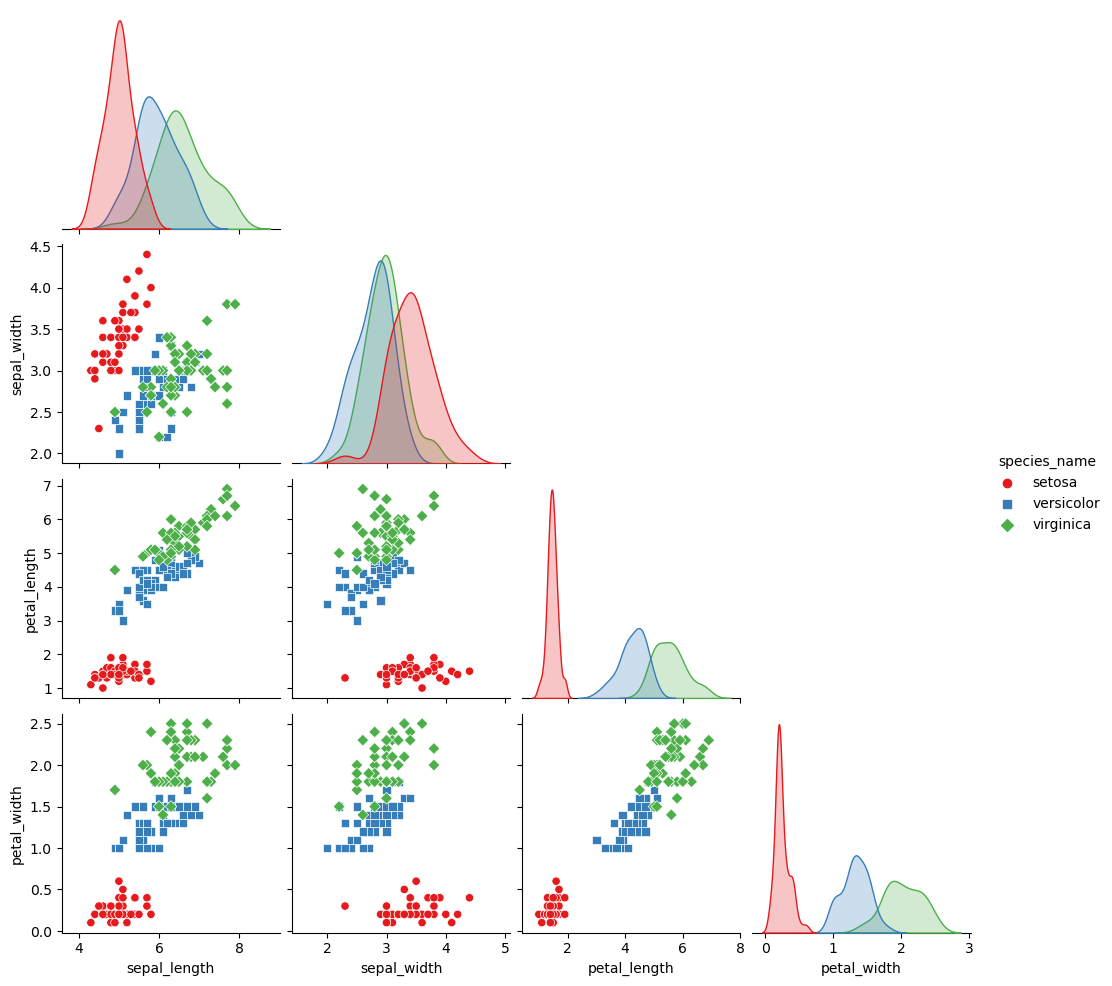

In [140]:
# Create a pairplot with color representing species
sns.pairplot(iris, hue='species_name', markers=["o", "s", "D"], palette='Set1',corner=True)

# Show the plot
plt.show()

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


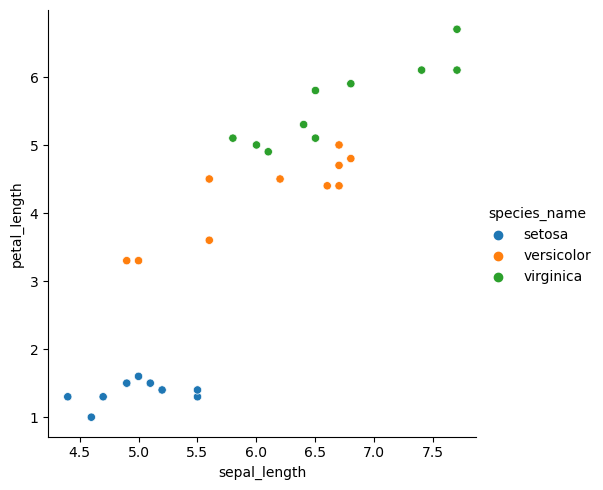

In [142]:
sns.relplot(data=test, x='sepal_length',y='petal_length',hue='species_name')

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


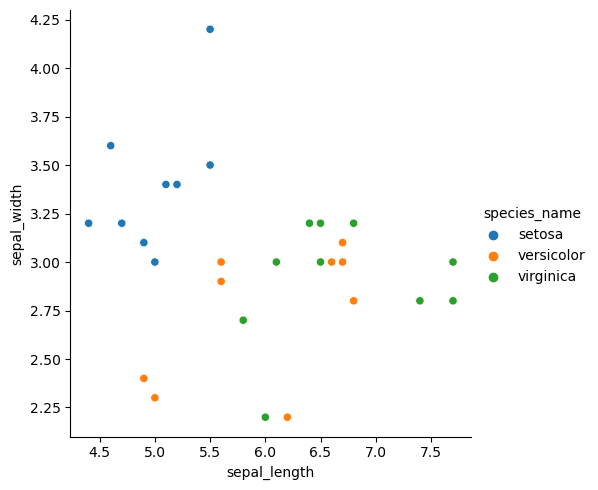

In [143]:
# is the sepal area signficantly different in virginica & versicolor?

sns.relplot(data=test, x='sepal_length',y='sepal_width',hue='species_name')

In [145]:
virginica_length = test[test.species_name=='virginica'].sepal_length
versicolor_length = test[test.species_name=='versicolor'].sepal_length
virginica_width = test[test.species_name=='virginica'].sepal_width
versicolor_width = test[test.species_name=='versicolor'].sepal_width


In [154]:
virginica_area = virginica_length * virginica_width
versicolor_area = versicolor_length * versicolor_width
versicolor_area.info()

<class 'pandas.core.series.Series'>
Index: 10 entries, 2 to 2
Series name: None
Non-Null Count  Dtype  
--------------  -----  
10 non-null     float64
dtypes: float64(1)
memory usage: 160.0 bytes


In [164]:
## 2 sample 2 tailed test fpr sepal_width
Ho = 'sepal area has no difference between virginica & versicolor'
Ha = 'sepal area has difference between virginica & versicolor'
alpha = 0.05

s,p=stats.mannwhitneyu(virginica_area,versicolor_area)
s,p


if p<alpha:
    print(f'reject:{Ho}')
else:
    print(f'fail to reject: {Ho}, with p = {p}')

fail to reject: sepal area has no difference between virginica & versicolor, with p = 0.10397974445898675


# Telco Dataset

In [190]:
telco = acquire.get_telco_data()

this file exists, reading from csv


In [191]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0002-ORFBO to 9995-HOTOH
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   gender                    7043 non-null   object 
 1   senior_citizen            7043 non-null   int64  
 2   partner                   7043 non-null   object 
 3   dependents                7043 non-null   object 
 4   tenure                    7043 non-null   int64  
 5   phone_service             7043 non-null   object 
 6   multiple_lines            7043 non-null   object 
 7   internet_service_type_id  7043 non-null   int64  
 8   online_security           7043 non-null   object 
 9   online_backup             7043 non-null   object 
 10  device_protection         7043 non-null   object 
 11  tech_support              7043 non-null   object 
 12  streaming_tv              7043 non-null   object 
 13  streaming_movies          7043 non-null   object 
 14

In [192]:
    telco= telco.drop(['payment_type_id'],axis =1)
    telco=telco.drop(['contract_type_id'],axis =1)
    telco=telco.drop(['internet_service_type_id'],axis =1)
 # Strip leading and trailing whitespaces from the column with blank values
    telco['total_charges'] = telco['total_charges'].str.strip()
# Drop rows with blank values in the specified column
    telco = telco[telco['total_charges'] != '']

In [193]:
telco.isnull().sum()
telco.internet_service_type.value_counts(dropna=False)

internet_service_type
Fiber optic    3096
DSL            2416
NaN            1520
Name: count, dtype: int64

In [194]:
telco['internet_service_type'] = telco['internet_service_type'].fillna('neither')

In [195]:
telco['total_charges'] = pd.to_numeric(telco['total_charges'], errors='coerce')

In [196]:
telco.nunique()

gender                      2
senior_citizen              2
partner                     2
dependents                  2
tenure                     72
phone_service               2
multiple_lines              3
online_security             3
online_backup               3
device_protection           3
tech_support                3
streaming_tv                3
streaming_movies            3
paperless_billing           2
monthly_charges          1584
total_charges            6530
churn                       2
contract_type               3
payment_type                4
internet_service_type       3
dtype: int64

In [197]:
# Bin the tenure and monthly_charges columns
bins = [0, 12, 24, 36, 48, 60, 72]
labels = ['< 1yr', '1-2 yr', '2-3yr', '3-4yr', '4-5yr', '5-6yr']

telco['tenure_bin'] = pd.cut(telco['tenure'], bins=bins, labels=labels)

In [199]:
telco.head()
telco.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0002-ORFBO to 9995-HOTOH
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   gender                 7032 non-null   object  
 1   senior_citizen         7032 non-null   int64   
 2   partner                7032 non-null   object  
 3   dependents             7032 non-null   object  
 4   tenure                 7032 non-null   int64   
 5   phone_service          7032 non-null   object  
 6   multiple_lines         7032 non-null   object  
 7   online_security        7032 non-null   object  
 8   online_backup          7032 non-null   object  
 9   device_protection      7032 non-null   object  
 10  tech_support           7032 non-null   object  
 11  streaming_tv           7032 non-null   object  
 12  streaming_movies       7032 non-null   object  
 13  paperless_billing      7032 non-null   object  
 14  monthly_charges        7032 no

<Axes: >

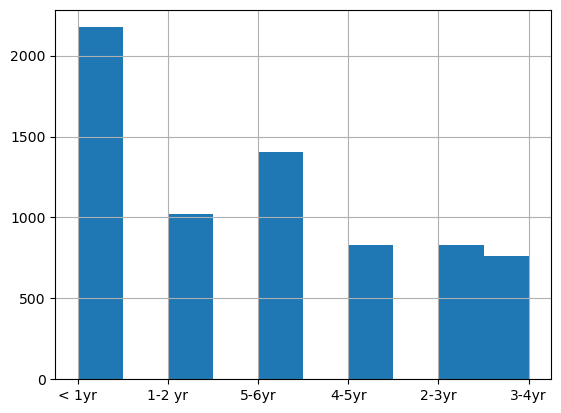

In [200]:
telco.tenure_bin.hist()

In [201]:
telco.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,payment_type,internet_service_type,tenure_bin
customer_id,,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,...,Yes,No,Yes,65.6,593.30,No,One year,Mailed check,DSL,< 1yr
0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,No,...,No,Yes,No,59.9,542.40,No,Month-to-month,Mailed check,DSL,< 1yr
0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,Yes,...,No,No,Yes,73.9,280.85,Yes,Month-to-month,Electronic check,Fiber optic,< 1yr
0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,Yes,...,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Electronic check,Fiber optic,1-2 yr
0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,No,...,Yes,No,Yes,83.9,267.40,Yes,Month-to-month,Mailed check,Fiber optic,< 1yr


In [205]:
telco['streaming_services'] = np.where(
    (telco['streaming_tv'] == 'Yes') & (telco['streaming_movies'] == 'Yes'), 'TV and Movies',
    np.where(
        (telco['streaming_tv'] == 'Yes') & (telco['streaming_movies'] == 'No'), 'TV',
        np.where(
            (telco['streaming_tv'] == 'No') & (telco['streaming_movies'] == 'Yes'), 'Movies',
            'No Streaming'
        )
    )
)

telco = telco.drop(['streaming_tv', 'streaming_movies'], axis=1)

            streaming_services
customer_id                   
0002-ORFBO                  TV
0003-MKNFE              Movies
0004-TLHLJ        No Streaming
0011-IGKFF       TV and Movies
0013-EXCHZ                  TV
...                        ...
9987-LUTYD        No Streaming
9992-RRAMN              Movies
9992-UJOEL        No Streaming
9993-LHIEB              Movies
9995-HOTOH       TV and Movies

[7032 rows x 1 columns]


In [233]:
telco['phone_lines'] = np.where(
    (telco['phone_service'] == 'Yes') & (telco['multiple_lines'] == 'Yes'), 'multiple',
    np.where(
        (telco['phone_service'] == 'Yes') & (telco['multiple_lines'] == 'No'), 'single',
        np.where(
            (telco['phone_service'] == 'No'), 'no service',
            'No Streaming'
        )
    )
)


In [234]:
telco = telco.drop(['phone_service', 'multiple_lines'], axis=1)

In [230]:
telco['phone_lines'].value_counts()

phone_lines
single        3385
multiple      2967
no service     680
Name: count, dtype: int64

In [235]:
print(telco.nunique())
telco.head()

gender                      2
senior_citizen              2
partner                     2
dependents                  2
tenure                     72
online_security             3
online_backup               3
device_protection           3
tech_support                3
paperless_billing           2
monthly_charges          1584
total_charges            6530
churn                       2
contract_type               3
payment_type                4
internet_service_type       3
tenure_bin                  6
streaming_services          4
phone_lines                 3
dtype: int64


,gender,senior_citizen,partner,dependents,tenure,online_security,online_backup,device_protection,tech_support,paperless_billing,monthly_charges,total_charges,churn,contract_type,payment_type,internet_service_type,tenure_bin,streaming_services,phone_lines
customer_id,,,,,,,,,,,,,,,,,,,
0002-ORFBO,Female,0,Yes,Yes,9,No,Yes,No,Yes,Yes,65.6,593.30,No,One year,Mailed check,DSL,< 1yr,TV,single
0003-MKNFE,Male,0,No,No,9,No,No,No,No,No,59.9,542.40,No,Month-to-month,Mailed check,DSL,< 1yr,Movies,multiple
0004-TLHLJ,Male,0,No,No,4,No,No,Yes,No,Yes,73.9,280.85,Yes,Month-to-month,Electronic check,Fiber optic,< 1yr,No Streaming,single
0011-IGKFF,Male,1,Yes,No,13,No,Yes,Yes,No,Yes,98.0,1237.85,Yes,Month-to-month,Electronic check,Fiber optic,1-2 yr,TV and Movies,single
0013-EXCHZ,Female,1,Yes,No,3,No,No,No,Yes,Yes,83.9,267.40,Yes,Month-to-month,Mailed check,Fiber optic,< 1yr,TV,single


In [227]:
telco[telco.phone_service == 'No'].value_counts('multiple_lines')

multiple_lines
No phone service    680
Name: count, dtype: int64

In [ ]:
gender = pd.crosstab(telco['gender'], telco['churn'])
senior = pd.crosstab(telco['senior_citizen'], telco['churn'])
depend = pd.crosstab(telco['dependents'], telco['churn'])
phone = pd.crosstab(telco['phone_service'], telco['churn'])


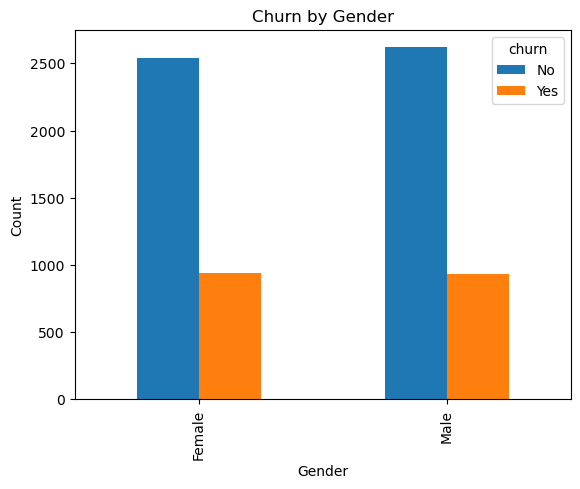

In [222]:
gender.plot(kind='bar')
plt.title('Churn by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [238]:
print(telco.online_backup.value_counts())
print(telco.online_security.value_counts())


online_backup
No                     3087
Yes                    2425
No internet service    1520
Name: count, dtype: int64
online_security
No                     3497
Yes                    2015
No internet service    1520
Name: count, dtype: int64
